Import the dataset.

[Click here for the dataset](https://gist.github.com/KhanradCoder/35a6beea49e5b9ba62797e595a9626c0)

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np



In [ ]:
!pip install pandas

In [ ]:
#Load Cancer data
d1 = files.upload()
dataset = pd.read_csv('cancer.csv')
df = pd.read_csv('cancer.csv')

Saving cancer.csv to cancer.csv


In [ ]:
#establishes the x axis as all columns except for the first column in the CSV
x = dataset.drop(columns=["diagnosis(1=m, 0=b)"])

In [ ]:
#establishes the y axis as the first column in the CSV
y = dataset["diagnosis(1=m, 0=b)"]

Split the data into a training set and a testing set.

In [ ]:
#we are using sklearn to split the dataset into training data and test data
#training data is used to train the model, test data is used to evaluate the accuracy of the model after training
#here we use a 80/20 split with 20% (0.2) of the data in our CSV being test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Build and train the model.

In [ ]:
#Tensorflow - typically used in large scale situations and production.
#PyTorch - typically used in research and dynamic projects.
import tensorflow as tf

model = tf.keras.models.Sequential()

In [ ]:
#This is where we build the input, hidden and output layers of our neural network.
#We set the number of neutrons/nodes, what input we're using, exclude the first column in the CSV and set our activation to the sigmoid function since it fits our Y (0 or 1).
#The output layer has one neutron since it's just retunring one value. 1/0 malignant or benign.
model.add(tf.keras.layers.Dense(256, input_shape=x_train.shape[1:], activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Here we are compiling the model.
#We set our optimizer to the adam algorithm to minimize the loss.
#We set our loss/log loss function to binary_crossentropy.
#We set our metrics to accuracy given our use case. Make sure ypred = ytrue.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#This is where we train the model. We give it x_train and y_train as our training data.
#We run it for 1000 epochs. This means the dataset training data passes through the algorithm 1000 times.
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
15/15 [==============================] - 1s 7ms/step - loss: 0.6054 - accuracy: 0.6374
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4316 - accuracy: 0.8747
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.3100 - accuracy: 0.9033
Epoch 4/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.2631 - accuracy: 0.9055
Epoch 5/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.2455 - accuracy: 0.9077
Epoch 6/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.2681 - accuracy: 0.8879
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2346 - accuracy: 0.9099
Epoch 8/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2379 - accuracy: 0.9121
Epoch 9/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.2199 - accuracy: 0.9121
Epoch 10/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.2464 - accuracy: 0.9033

Evaluate the model.

In [ ]:
#Here we are evaluating the accuracy of our model against the training data that we split earlier in the same dataset.
# what does the output tell you?
#It tells us hpw accurate the AI is against the training data.
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.9649


[0.12305177748203278, 0.9649122953414917]

In [ ]:
#print all of the column headers in the dataset
column_headers = df.columns.tolist()
print(column_headers)

['diagnosis(1=m, 0=b)', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
#Print the largest Radius_mean in the dataset
largest_value = df['radius_mean'].max()
print(largest_value)

28.11


In [ ]:
#Print number of positive cases in the dataset
positive_cases = df['diagnosis(1=m, 0=b)'].value_counts()[1]
print(positive_cases, "postive cases.")

212 postive cases.


In [ ]:
#print the row that has the largest radius mean in the dataset
largest_RM_row = df['radius_mean'].sort_values(ascending=False).index[0]
print('Largest range mean can be found on row', largest_RM_row,)

Largest range mean can be found on row 212


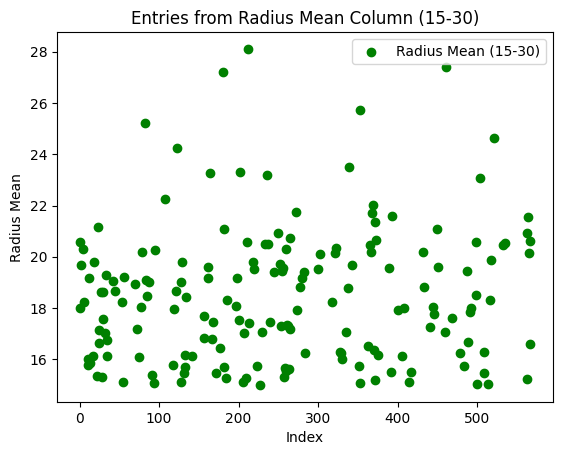

In [ ]:
#Plot the range of data where the radius mean was greater than or equal to 15 or less than or equal to 30

#Read the dataframe
df = pd.read_csv('cancer.csv')

#Filter data in the column radius_mean to only include entries where it is 15 - 30
filtered_data = df[(df['radius_mean'] >= 15) & (df['radius_mean'] <= 30)]

#Establish X and Y filtered date/index
#Make the dots green and add a label for the data
#Index is the row number of the entry in the CSV
plt.scatter(filtered_data.index, filtered_data['radius_mean'], color='green', label='Radius Mean (15-30)')

#Label X & Y axis
#Label graph
#Add the legend (label we created earlier)
plt.xlabel('Index')
plt.ylabel('Radius Mean')
plt.title('Entries from Radius Mean Column (15-30)')
plt.legend()

#Plot the graph
plt.show()

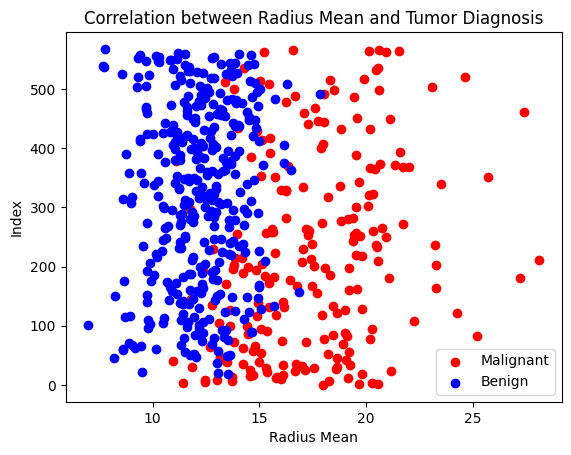

In [ ]:
#df = pd.DataFrame({
#    'diagnosis(1=m, 0=b)' : [1, 0],
#    'radius_mean' : [0, 30]
#})
#
#df.plot(x="diagnosis(1=m, 0=b)", y="radius_mean", kind="bar")

#start_index = 20
#end_index = 30
#column_name = 'radius_mean'
#
#data_to_plot = df.loc[start_index:end_index, column_name]
#
#plt.plot(data_to_plot)
#
#plt.xlabel('Index')
#plt.ylabel('Value')
#plt.title('Plot of Data from Column "{}"'.format(column_name))

##############################################################################################################################################################################################################################

#Plot the correlation between radius mean and whether or not the diagnosis was malignant (1) of benign (0)

#Read the dataframe
df = pd.read_csv('cancer.csv')

#Set two variables
#malignant data where the value in the first column is 1
#benign data where the value in the first column is 0
malignant_data = df[df['diagnosis(1=m, 0=b)'] == 1]
benign_data = df[df['diagnosis(1=m, 0=b)'] == 0]

#Create two scatter plots for the malignant and benign data
#Index the variable establsihed earlier
#Set color of malignant dots to red, benign to blue
#Create labels for malignant and benign dots
plt.scatter(malignant_data['radius_mean'], malignant_data.index, color='red', label='Malignant')
plt.scatter(benign_data['radius_mean'], benign_data.index, color='blue', label='Benign')

#Label X and Y axis as Radius Mean and Index
#Index is the row number for the entry in the CSV
#Title the graph
#Add the legend (labels we created earlier)
plt.xlabel('Radius Mean')
plt.ylabel('Index')
plt.title('Correlation between Radius Mean and Tumor Diagnosis')
plt.legend()

#Plot the graph
plt.show()

